## Question 1

In machine learning, kernel functions and polynomial functions are closely related, especially in the context of support vector machines (SVMs) and the kernel trick. Let's explore the relationship between polynomial functions and kernel functions.


Polynomial Functions:

A polynomial function is a mathematical function of the form:

f(x) = a(n)x^n + a(n-1)x^(n-1)+ .... + a1x + a0

where x is the variable, an ,an-1, ... , a1, a0 are coefficients and n is a non negative integer representing the degree of the polynomial. The degree n determines the highest power of x in the polynomial.

Kernel Functions:

In the context of machine learning, a kernel function is a mathematical function that computes the similarity (or inner product) between two vectors in a higher-dimensional space without explicitly transforming the vectors into that space. Kernel functions are commonly used in algorithms such as support vector machines (SVMs) to handle non-linear decision boundaries.

The polynomial kernel is defined as:
K(x,y) = (x.y +c)^d

x and y are input vectors,
c is a constant term,
d is the degree of the polynomial.

The key idea behind the kernel trick is that instead of explicitly computing the transformation of input vectors into a higher-dimensional space, the kernel function allows us to compute the similarity directly in the original feature space. This is computationally efficient and avoids the need to store and compute the transformed feature vectors explicitly.
The polynomial kernel is an example of how a polynomial function is used to define a kernel function. It captures the relationships between data points that may not be linearly separable in the original feature space.

## Question 2

Implementing an SVM with a polynomial kernel in Python using Scikit-learn is straightforward. Scikit-learn provides the SVC (Support Vector Classification) class, and you can specify the polynomial kernel by setting the kernel parameter to 'poly'. Let's try implementing this on the iris dataset.

accuracy score:  0.5333333333333333


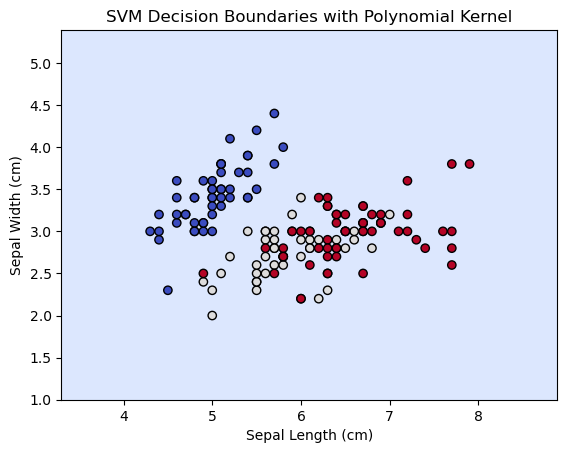

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris=load_iris()
X=iris.data[:,:2]  # using only two features for visualization
y=iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

classifier=SVC(kernel='poly',degree=3,C=0.1)
classifier.fit(X_train_scaled,y_train)
y_pred=classifier.predict(X_test_scaled)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy score: ",accuracy)

x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
Z=classifier.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('SVM Decision Boundaries with Polynomial Kernel')
plt.show()

## Question 3

In Support Vector Regression (SVR), the parameter epsilon (ε) is a crucial hyperparameter that determines the width of the epsilon-insensitive tube. The epsilon-insensitive tube is a region around the regression line (or hyperplane in higher dimensions) within which errors are ignored or not penalized. Data points falling inside this tube do not contribute to the loss function, and only those outside the tube are considered errors.

When you increase the value of epsilon, you are essentially widening the epsilon-insensitive tube. A wider tube means that more data points can fall within the tube without contributing to the loss. Consequently, fewer data points may become support vectors because the model allows for a larger margin of error.

If the epsilon-insensitive tube is wide enough, fewer data points need to be considered as support vectors to satisfy the SVR constraints. Support vectors are the data points that are either on the boundary of the tube or have their predictions outside the tube. With a wider tube, some of the data points that would have been considered errors with a smaller epsilon may now fall within the tube, leading to fewer support vectors.

A larger epsilon typically results in a simpler model with a larger margin of tolerance for errors. Simpler models with fewer support vectors may generalize better to new, unseen data, but they might sacrifice precision on the training data.

## Question 4

Support Vector Regression (SVR) is a powerful technique for regression tasks, and the performance of SVR is influenced by several key hyperparameters: the choice of kernel function, C parameter, epsilon parameter (ε), and gamma parameter (γ).

1. Kernel Function:

The kernel function determines the type of mapping used to transform the input features into a higher-dimensional space. The choice of kernel function influences the flexibility of the SVR model. Common kernel functions include linear, polynomial, radial basis function (RBF or Gaussian), and sigmoid.

Linear Kernel ('linear'): Suitable for linear relationships.

Polynomial Kernel ('poly'): Introduces non-linearity with a polynomial mapping. Adjust the degree parameter.

RBF Kernel ('rbf' or 'gaussian'): Suitable for non-linear relationships. Adjust the gamma parameter.

Sigmoid Kernel ('sigmoid'): Suitable for data with a sigmoid shape.

2. C parameter:

The C parameter controls the trade-off between achieving a smooth fit and minimizing training error. A smaller C allows for a larger margin, potentially leading to a simpler model with more errors tolerated. A larger C penalizes errors more, resulting in a model that fits the training data more closely.

3. Epsilon Parameter: 

The epsilon parameter defines the width of the epsilon-insensitive tube. It determines the level of tolerance for errors; data points within the tube are not considered errors, while those outside the tube contribute to the loss.

4. Gamma Parameter (γ):

The gamma parameter is specific to the RBF kernel and influences the shape of the decision boundary. A smaller gamma results in a wider and smoother decision boundary, while a larger gamma makes the boundary more flexible, potentially fitting the training data more closely.

## Question 5

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset=load_breast_cancer()
X=dataset.data
y=dataset.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
classifier=SVC(kernel='linear')
classifier.fit(X_train_scaled,y_train)

y_pred=classifier.predict(X_test_scaled)

print("accuracy: ",accuracy_score(y_test,y_pred))
print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("F-1 score: ",f1_score(y_test,y_pred))

accuracy:  0.97
precision:  0.984251968503937
recall:  0.9689922480620154
F-1 score:  0.9765625


In [12]:
## hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid={
    'C':[0.001,0.01,0.1,10,100],
    'kernel':['linear','rbf'],
    'gamma':[1,0.1,0.01,0.001,0.0001]
}
grid=GridSearchCV(classifier,param_grid=param_grid,cv=5,refit=True,verbose=3)
grid.fit(X_train_scaled,y_train)
grid.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.932 total time=   0.0s
[CV 2/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.946 total time=   0.0s
[CV 3/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.932 total time=   0.0s
[CV 4/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.905 total time=   0.0s
[CV 5/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.904 total time=   0.0s
[CV 1/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.622 total time=   0.0s
[CV 2/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.622 total time=   0.0s
[CV 3/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.622 total time=   0.0s
[CV 4/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 5/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 1/5] END .C=0.001, gamma=0.1, kernel=linear;, score=0.932 total time=   0.0s
[CV 2/5] END .C=0.001, gamma=0.1, kernel=linear

[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.622 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.622 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.622 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.973 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.973 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.986 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.946 total time=   0.0s
[CV 3/5] END ......C=0.1, ga

[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 1/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.932 total time=   0.0s
[CV 2/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.959 total time=   0.0s
[CV 3/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.986 total time=   0.0s
[CV 4/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.959 total time=   0.0s
[CV 5/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.959 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.946 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.973 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.946 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.973 total time=   0.0s
[CV 1/5] END .C=100, gamma=0.001, kernel=linear;, score=0.932 total time=   0.0s
[CV 2/5] END .C=100, gamma=0

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [13]:
y_pred1=grid.predict(X_test_scaled)
print("accuracy: ",accuracy_score(y_test,y_pred1))
print("precision: ",precision_score(y_test,y_pred1))
print("recall: ",recall_score(y_test,y_pred1))
print("F-1 score: ",f1_score(y_test,y_pred1))

accuracy:  0.98
precision:  0.9844961240310077
recall:  0.9844961240310077
F-1 score:  0.9844961240310077
